<ipython-input-8-5539787e1f0f>:25: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(xi, yi, z1, alpha=0.5, color='red')
<ipython-input-8-5539787e1f0f>:42: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(x2, y2, z2, alpha=0.5, color='green')


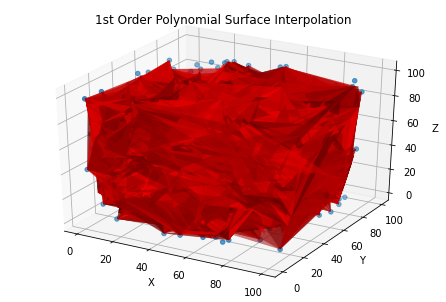

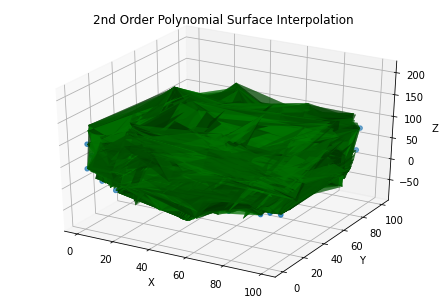

In [8]:
# 3D surface interpolation
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# read data
dataset = pd.read_excel('xyz.xlsx') 
x = dataset['X'].values
y = dataset['Y'].values
z = dataset['Z'].values

# 1st order polynomial surface interpolation
# create meshgrid
xi, yi = np.meshgrid(x, y)

# interpolate z values
z1 = griddata((x, y), z, (xi, yi), method='linear')

# plot 3d
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z)
ax.plot_surface(xi, yi, z1, alpha=0.5, color='red')
ax.set_xlabel('X')
ax.set_ylabel('Y') 
ax.set_zlabel('Z')
plt.title('1st Order Polynomial Surface Interpolation')

# 2nd order polynomial surface interpolation
# create meshgrid
x2, y2 = np.meshgrid(x, y)

# interpolate z values
z2 = griddata((x, y), z, (x2, y2), method='cubic')

# plot 3d
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z)
ax.plot_surface(x2, y2, z2, alpha=0.5, color='green')
ax.set_xlabel('X')
ax.set_ylabel('Y') 
ax.set_zlabel('Z')
plt.title('2nd Order Polynomial Surface Interpolation')

plt.show()

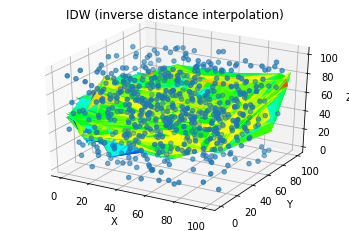

In [9]:
# Reading Excel file
df = pd.read_excel('/content/xyz.xlsx')

# Creating the data arrays
X = df['X'].values
Y = df['Y'].values
Z = df['Z'].values

# Creating 3D Meshgrid
xm, ym = np.meshgrid(X, Y)

# Calculating inverse distance interpolation
n_samples = 5
zm = np.zeros_like(xm)
for i in range(xm.shape[0]):
    for j in range(xm.shape[1]):
        # Finding the closest n_samples
        x_diff = X - xm[i, j]
        y_diff = Y - ym[i, j]
        dist = np.sqrt(x_diff**2 + y_diff**2)
        idx = dist.argsort()[:n_samples]
        zm[i, j] = np.mean(Z[idx])

# Plotting the result
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z)
ax.plot_surface(xm, ym, zm, cmap='hsv_r')
ax.set_xlabel('X')
ax.set_ylabel('Y') 
ax.set_zlabel('Z')
plt.title('IDW (inverse distance interpolation)')

# Showing the plot
plt.show()

In [10]:
z_diff = zm - z2
print(z_diff)

[[ -7.          -5.07878074 -24.90368937 ...  23.15050352 -19.05683475
   -7.        ]
 [ 33.         -38.          -8.         ...  30.           3.04141018
   33.        ]
 [ -1.96996502   8.85489151  12.         ... -12.         -13.01915675
   -1.96996502]
 ...
 [ 33.         -38.          -8.         ...  30.           3.04141018
   33.        ]
 [ 24.56198747   8.01166774 -16.94408468 ... -55.6927793   10.
   24.56198747]
 [ 33.         -38.          -8.         ...  30.           3.04141018
   33.        ]]
